<a href="https://colab.research.google.com/github/bcramp/GenAI/blob/main/HW3/Chatbot_Long_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Assignment 3 Extra Credit

Title: Parametric vs. Contextual Memory Analysis

Name: Brennen Cramp

Date: 2/17/2026

---

# **Chat Interface with Long-Term Memory**

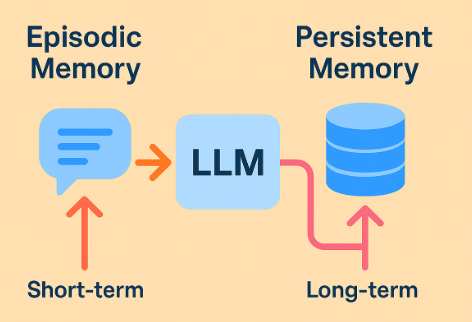

In [1]:
# Install the needed libraries
!pip install -qU langchain-google-genai

# The SQL memory features
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


# **Transition from Short-Term to Long-Term Memory**

* In the short-term memory notebook, if we stopped the program and restarted it, the **chat_history** list would be empty and the AI would forget everything.

* Using **SQLChatMessageHistory** ensures the conversation survives even if we turn off the computer.

* **connection_string="sqlite:///joke_factory.db**
   * This tells the program to create a **SQLite Database** file on the computer named **joke_factory.db**
   
   * Before, memory was stored in a **Python list (temporary)**
   
   * But now, memory is stored in a **database file (permanent)**

* **session_id**
   * This is like a label on a folder.
   * If we set the ID to **science_comedian_v1**, the database saves all messages under that **folder**

---
* The best part of using **SQLChatMessageHistory** is that we no longer need to manually manage the list.

  * When we add a message, it is instantly written to the .db file.

  * When we start the program, it automatically reads the old messages from the .db file into the AI's context.

  ---
* **About SQLite**
   * Unlike MySQL, SQLite doesn't have a separate server process.
   
   * There is no **installing** a database service.
   
   * It is a library that is built-in to Python.
   
   * When we specify a filename such as **joke_factory.db**, the database engine simply starts running inside yotheur code

   * The entire database—including all tables, indexes, and the chat history—is stored in one single cross-platform file.

   * In production environments, LLMs use MySQL for **Long-Term Memory** primarily to handle scale and structured data.

   * If we want to build a **Gym Bot**  used by 5,000 people, we can't have 5,000 different .db files floating around. MySQL allows us to store every user's chat history in one massive table, using a user_id column to keep them separate.


  ---


In [4]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage
from langchain_community.chat_message_histories import SQLChatMessageHistory

# Use the Google API Key stored
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

# Here, a normal/medium temperature of 1.0 will be used to make the LLM a mix of
# deterministic and creative responses
llm = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    temperature=1.0
)

# -----------------------------------------------------------------------

# Create the chatbot menu
print("--- CHATBOT MENU ---")
print("1. Science Facts")
print("2. American History")
choice = input("Select a topic to load: ")

# Create dynamic session mapping
topic_map = {"1": "science_session", "2": "history_session"}
current_session = topic_map.get(choice, "general_session")

# Initialize Persistent Long-Term Memory
# The bot will ONLY see messages associated with this specific ID
history = SQLChatMessageHistory(
  session_id=current_session,
  connection="sqlite:///chat_history.db"
)

# -----------------------------------------------------------------------

print(f"--- Chat Bot (Session: {current_session}) ---")
print(f"--- {len(history.messages)} messages loaded from memory ---")

# The Chat Loop
while True:
    # Gets the user input
    user_input = input("You: ")

    # Converts the user's input to lower case and compares if an exit command was entered
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Bot: Beep-Boop! Powering down. Goodbye! Beep-Boop!")
        break

    # Add user's message to the SQLite database
    history.add_user_message(user_input)

    # Retrieve the AI response
    # The ENTIRE history is passed from the database to Gemini 3
    response = llm.invoke(history.messages)
    ai_text = response.content[0]['text']

    # Prints Chat Bot's response
    print(f"Bot: {ai_text}")

    # Save the AI's response to the SQLite database
    history.add_ai_message(ai_text)


--- CHATBOT MENU ---
1. Science Facts
2. American History
Select a topic to load: 1
--- Chat Bot (Session: science_session) ---
--- 2 messages loaded from memory ---
You: What is the sun?
Bot: At its simplest, the **Sun is a massive, glowing ball of plasma at the center of our solar system.** It provides the energy (light and heat) that makes life on Earth possible.

Here is a breakdown of what the Sun is from a few different perspectives:

### 1. Its Composition (What it’s made of)
The Sun isn't a solid object like Earth. Instead, it is a giant ball of superheated gas (plasma).
*   **73% Hydrogen:** This is the primary fuel.
*   **25% Helium:** Created when hydrogen atoms fuse together.
*   **2% Other:** Trace amounts of oxygen, carbon, neon, and iron.

### 2. Its Engine (How it works)
The Sun stays "on" through a process called **nuclear fusion**. 
Deep in its core, the pressure is so intense and the temperature is so high (about 27 million°F / 15 million°C) that hydrogen atoms are c

## **1. Select Science. Tell the bot: "The sun is a star." Exit the chat.**

---

Output:

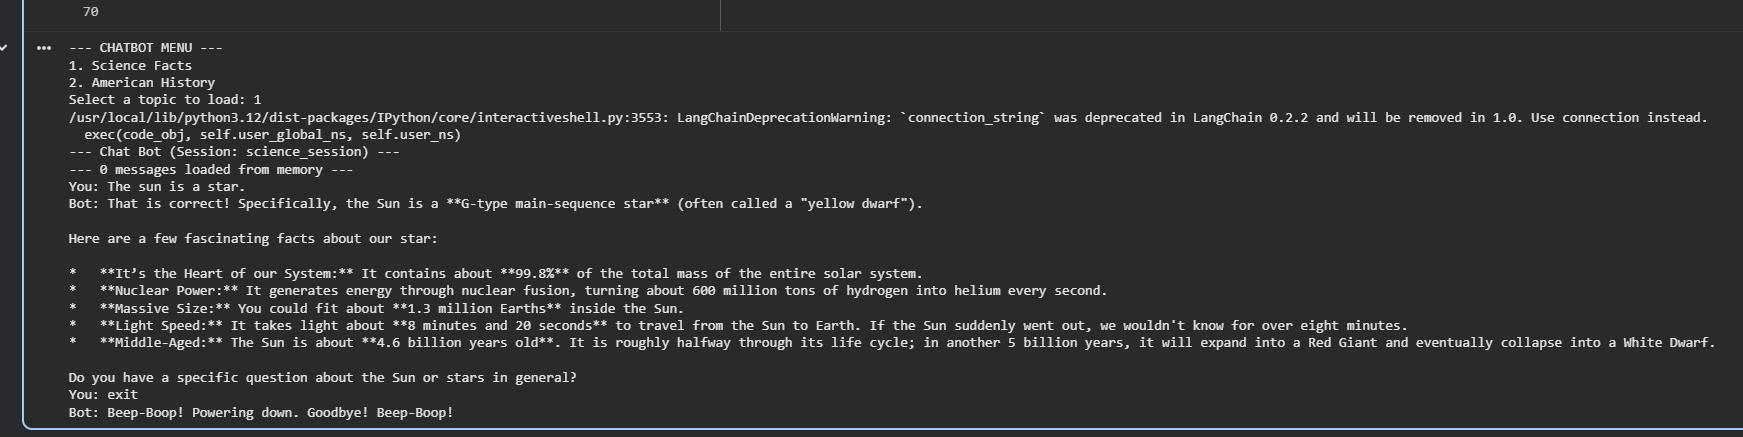

## **2. After restarting, select American History. Ask the bot: "What did I just say about the sun?" The bot should say it has no idea, because the Science data is locked in a different session ID.**

---

Ouput:

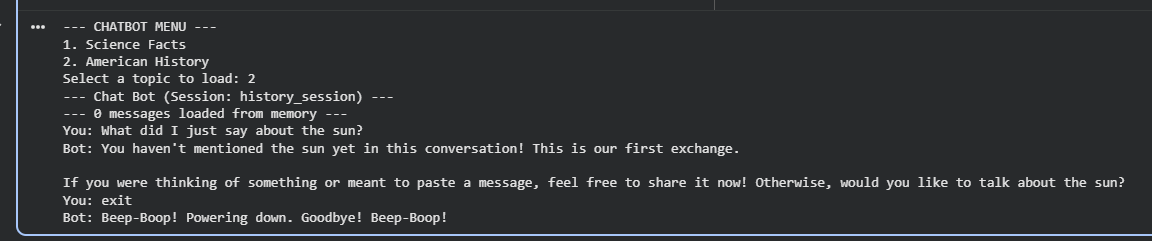

# 3. Switch back to Science Facts. Ask: "What is the sun?". The bot should remember it's a star.

---

Output:

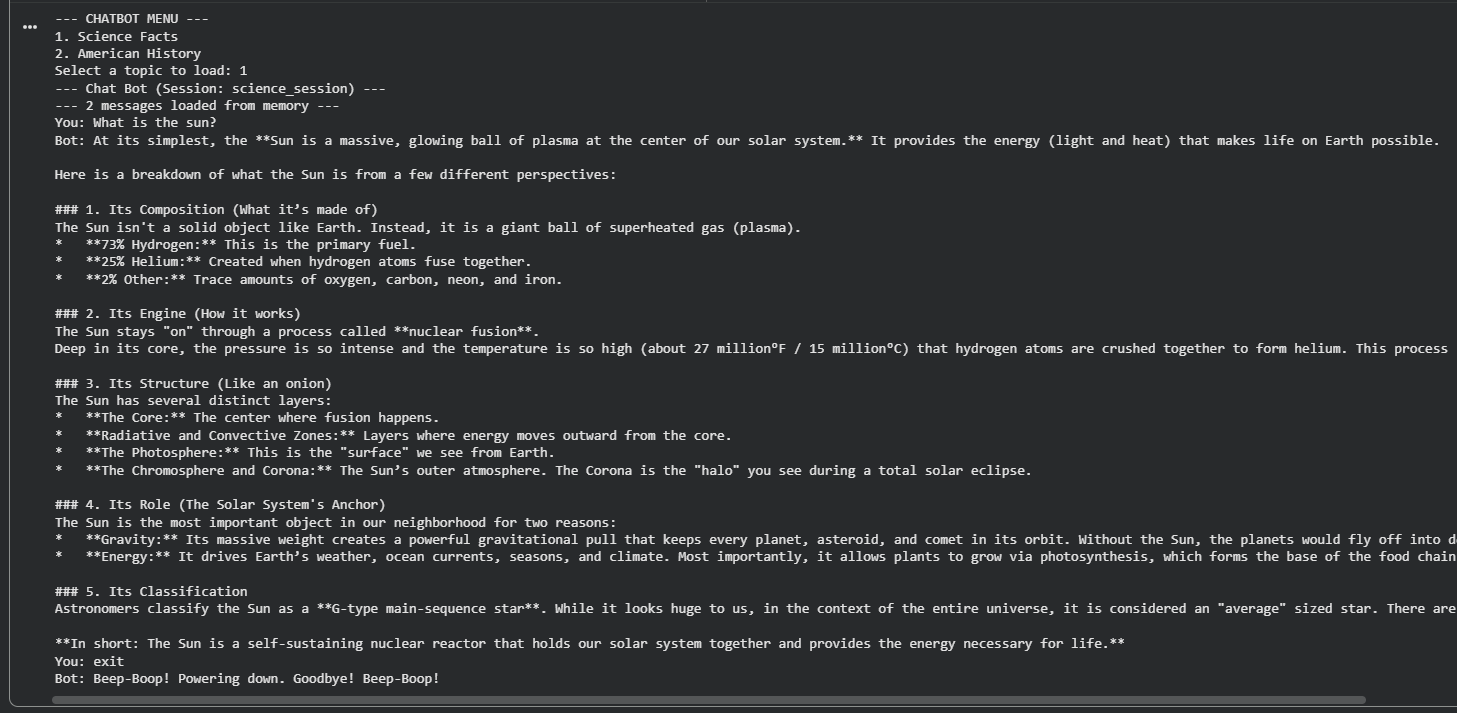

# **Analysis**

---

The “American History” bot could still be able to define the Sun if I answered the next question it proposed to me to talk about it but could not remember what was said previously about the sun because it was a new session. The “American History” can access general facts (Parametric Memory) due to its access to information from the LLM it is created from but could not access another session's history (Contextual Memory). This is because I stated where the Sun is a star is stored in the “Science Facts” bot's database of conversational history. Thus, when prompting the other session about what I just stated about the sun, it had no idea since its database is empty and has no contextual history about previous prompts or responses.

Despite both conversations being saved in the same .db file, the session_id prevented Context Pollution by using the topic_map to switch the session_id based on what the user input. The session_id kept each session separated and writing to its own tables which are specific to the individual session, meaning the two sessions databases of contextual history will not interweave with one another. For lamens terms, the "Science Facts" brain does not know what the "American History" brain knows due to each session having their own tables to write/read from with their own conversational histories.